# NOVA REAL ESTATE price predictor

In [1]:
import pandas as pd


In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
housing.info()  #X3 mein 410 values h . isse pata chal raha h ki missing data h apne paas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
housing['X2 house age'].value_counts()  # bataega ki har value ke kitne entries h 


0.0     17
13.6     7
13.3     6
16.2     6
16.4     6
        ..
30.2     1
4.3      1
24.0     1
8.4      1
18.8     1
Name: X2 house age, Length: 236, dtype: int64

In [6]:
housing.describe()    # 25 , 50 , 75 are percentiles like JEE. mean is average. std is standard deviation. 

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1080.284460,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1260.260814,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1449.113000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

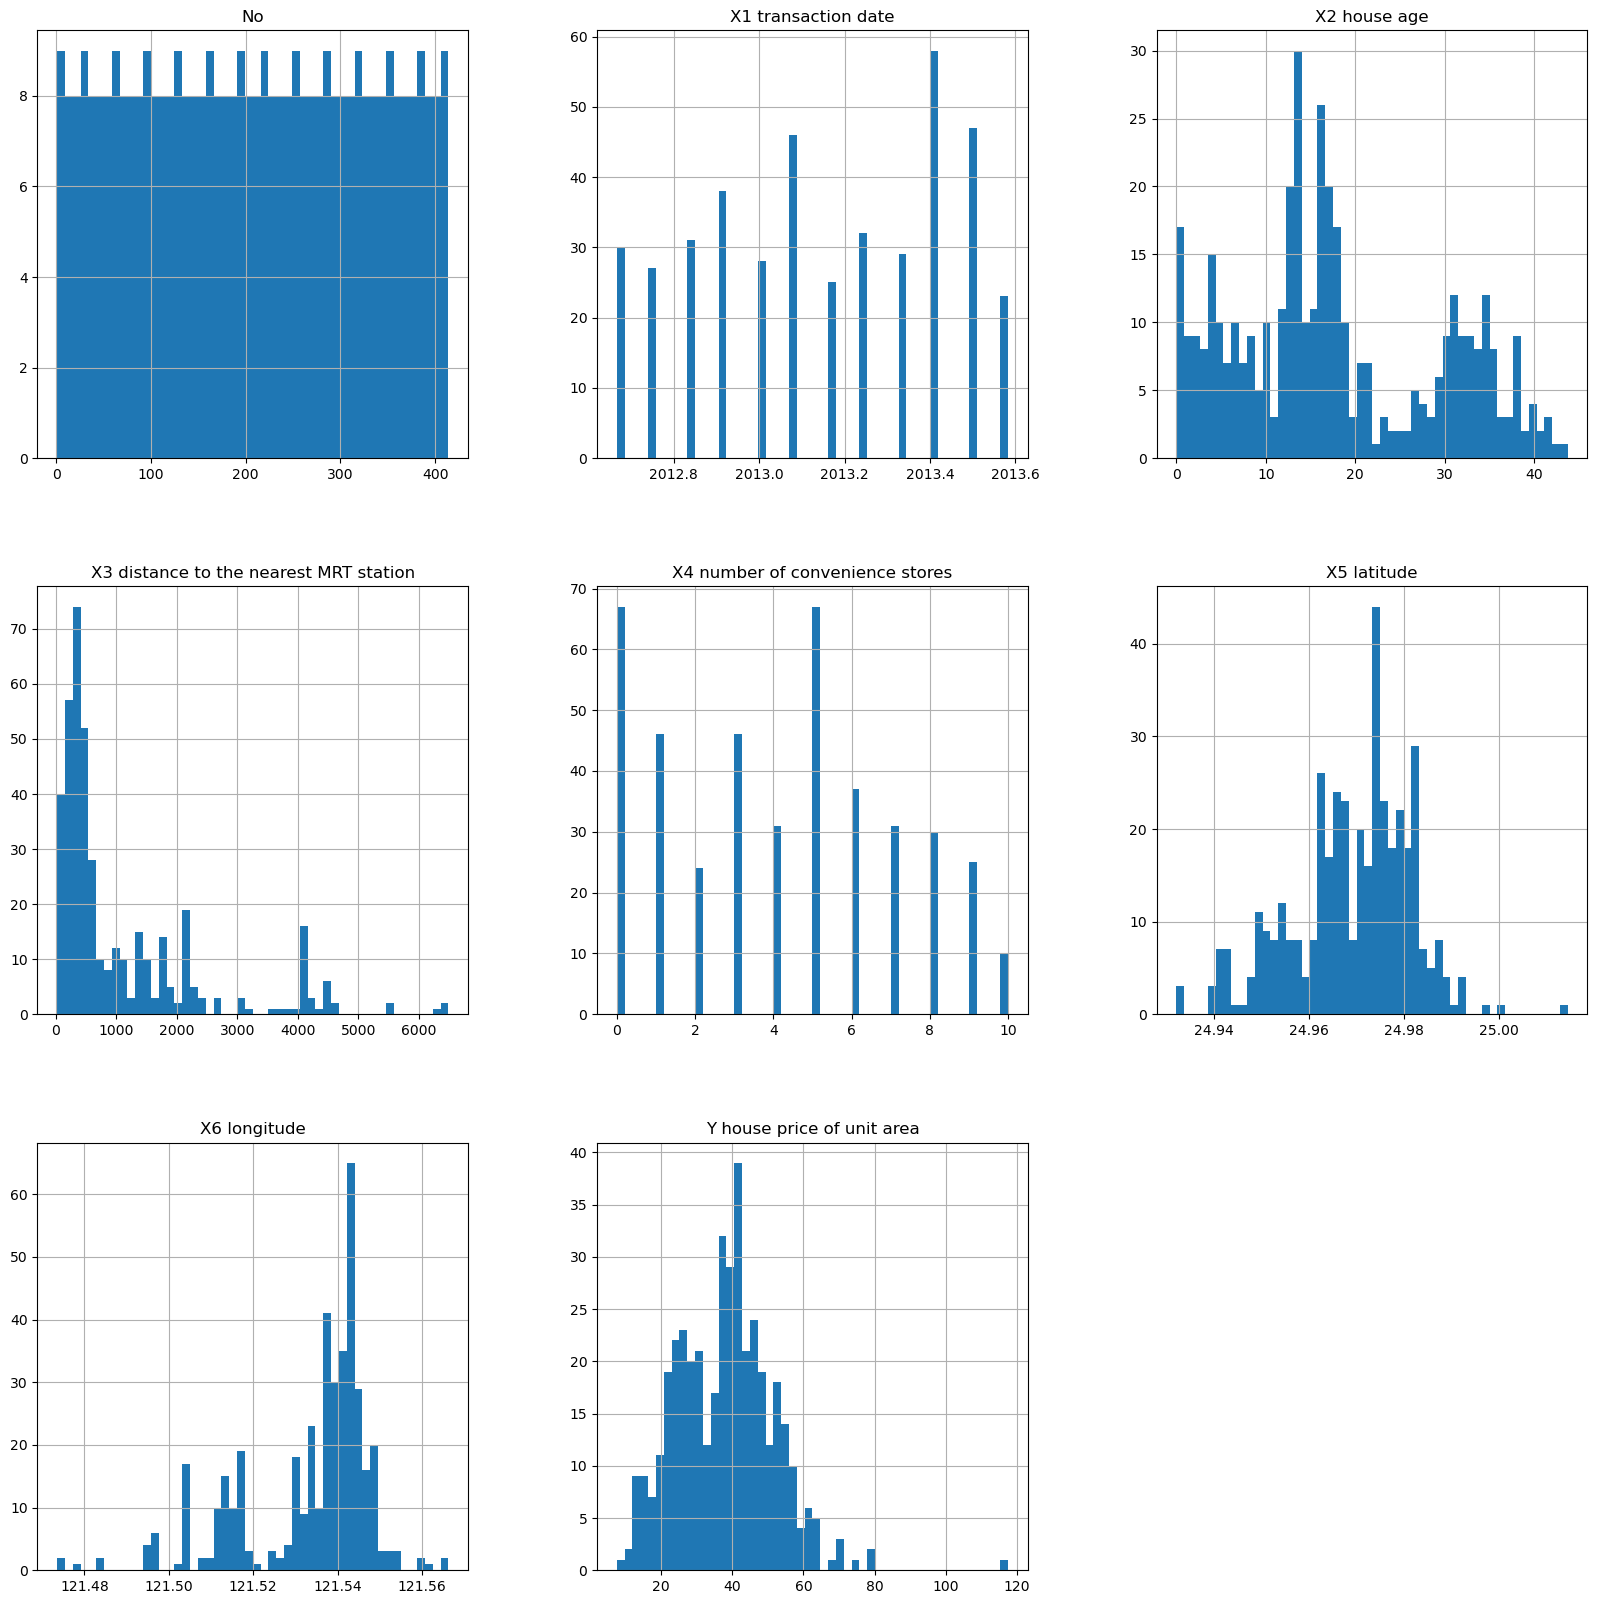

In [9]:
housing.hist(bins=50,  figsize=(20,20))

## Train Test Splitting

In [10]:
#for learning process
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
   
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio) # 80:20 ratio is best
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [11]:
#train_set,test_set=split_train_test(housing,0.2)
# seed daalne se kaafi sahi ho jata h. fix ho jata h 
 


In [12]:
#print(f"Rows in train_set : {len(train_set)}\n Rows in test set: {len(test_set)}\n")


In [13]:
# yeh upar ka sab sklearn mein h
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train_set : {len(train_set)}\n Rows in test set: {len(test_set)}\n")

Rows in train_set : 331
 Rows in test set: 83



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['X4 number of convenience stores']):
    stra_train_set=housing.loc[train_index]
    stra_test_set=housing.loc[test_index]

In [15]:
stra_test_set['X4 number of convenience stores'].value_counts()

5     14
0     14
3      9
1      9
6      7
4      6
7      6
8      6
9      5
2      5
10     2
Name: X4 number of convenience stores, dtype: int64

In [16]:
stra_train_set['X4 number of convenience stores'].value_counts()    # 0 aur 5 ke value counts ka ratio same h donon train
#aur test mein

0     53
5     53
3     37
1     37
6     30
7     25
4     25
8     24
9     20
2     19
10     8
Name: X4 number of convenience stores, dtype: int64

In [17]:
housing=stra_train_set.copy()

#  Looking for Correlations


In [18]:
corr_matrix=housing.corr()

In [19]:
corr_matrix['Y house price of unit area'].sort_values(ascending=False)   # pearson coefficients
#strong positive correlation
# 1 means strong positive correlation


Y house price of unit area                1.000000
X4 number of convenience stores           0.636209
X5 latitude                               0.569626
X6 longitude                              0.535064
X1 transaction date                       0.054334
No                                       -0.022784
X2 house age                             -0.182001
X3 distance to the nearest MRT station   -0.688099
Name: Y house price of unit area, dtype: float64

In [20]:
from pandas.plotting import scatter_matrix


In [21]:
attributes=["X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","Y house price of unit area"]

array([[<Axes: xlabel='X2 house age', ylabel='X2 house age'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X2 house age'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X2 house age'>,
        <Axes: xlabel='Y house price of unit area', ylabel='X2 house age'>],
       [<Axes: xlabel='X2 house age', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>],
       [<Axes: xlabel='X2 house age', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X4 number of convenience st

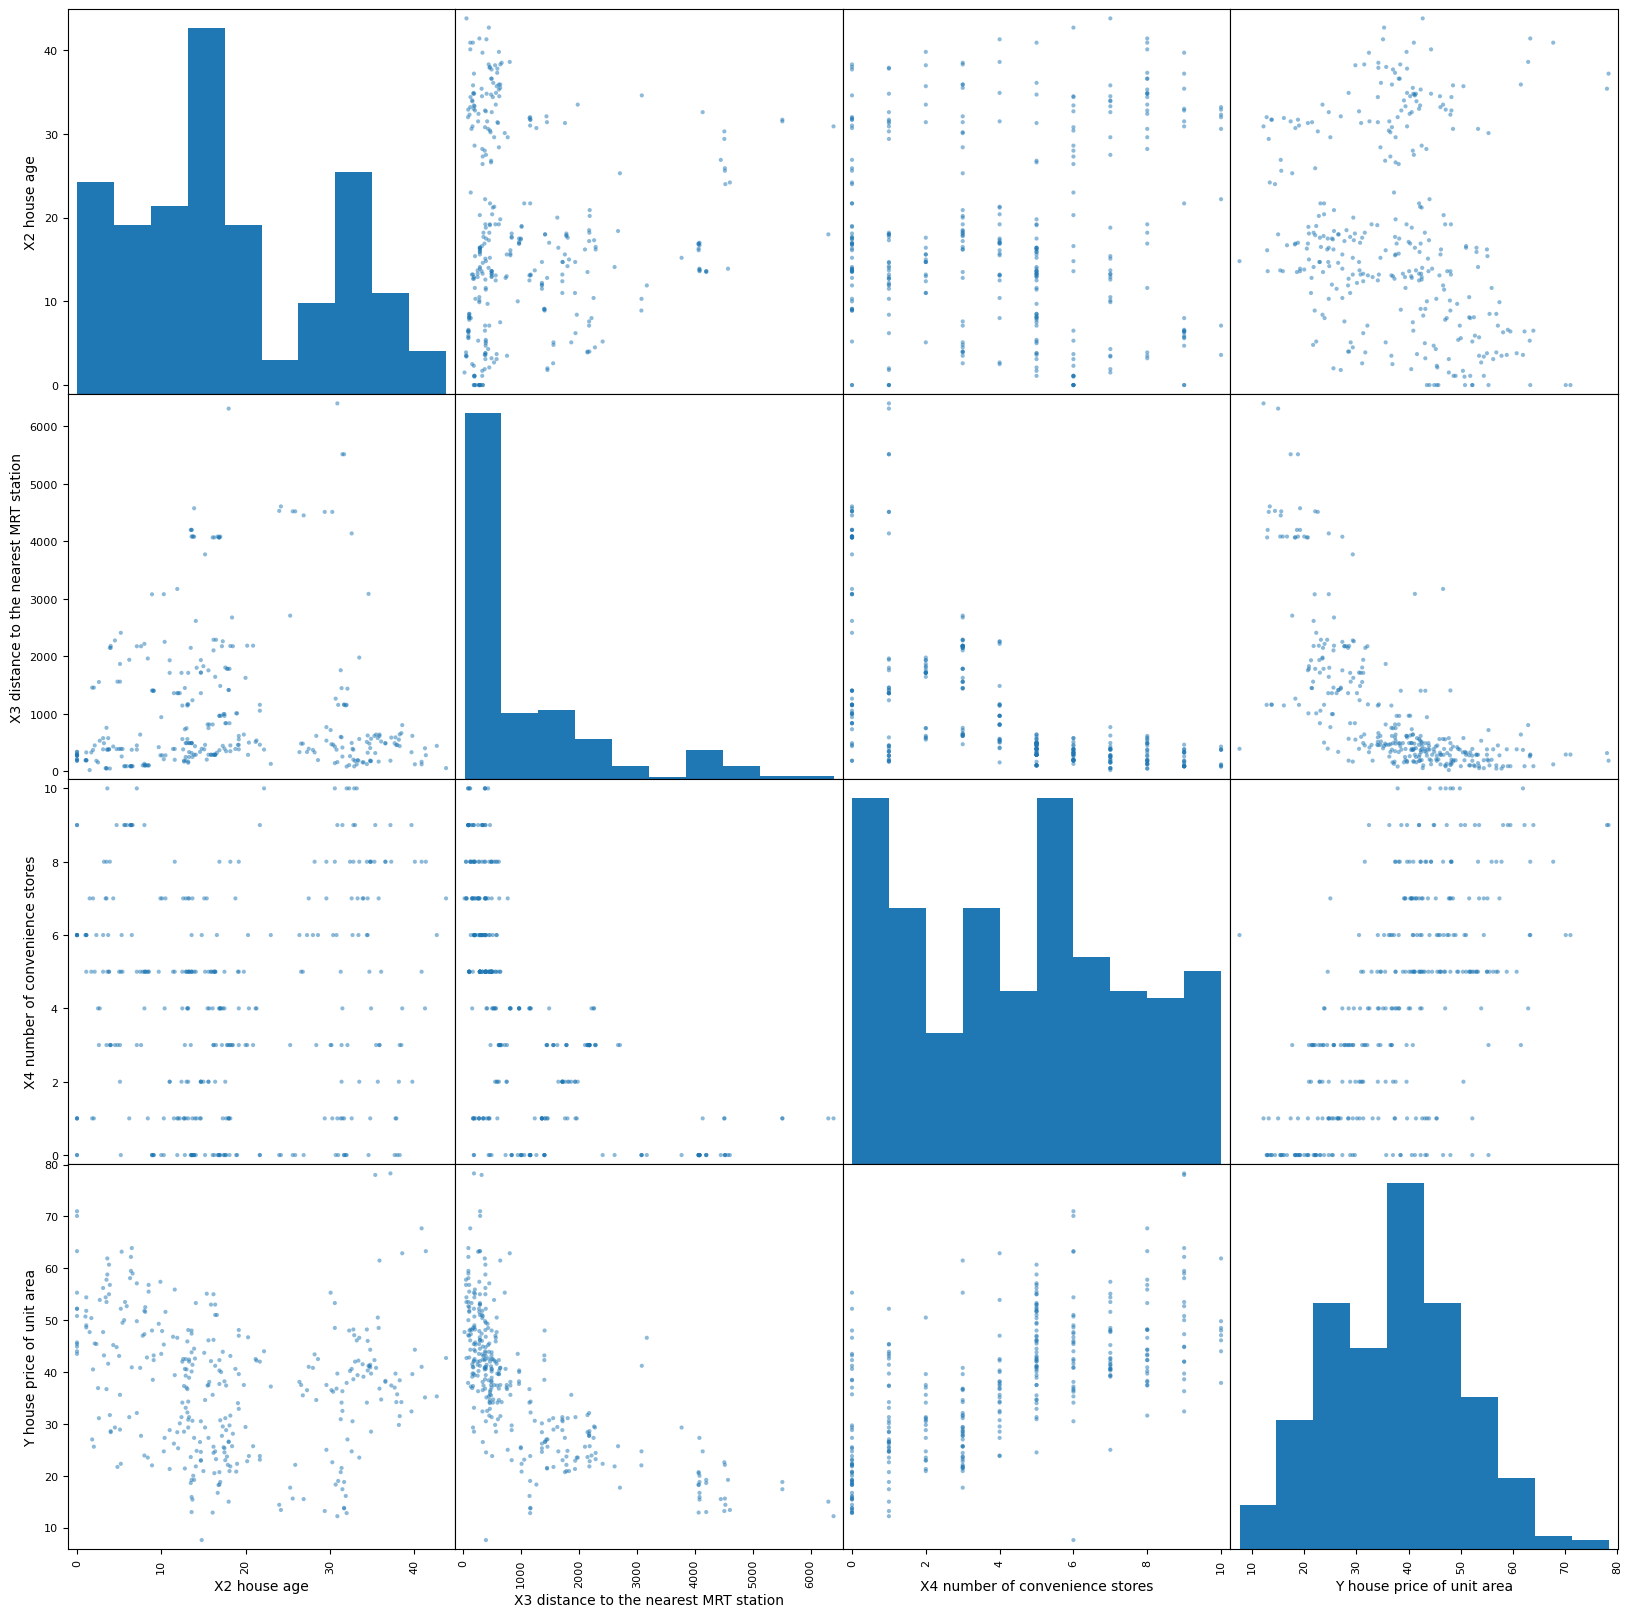

In [22]:
scatter_matrix(housing[attributes],figsize=(20,20)) #straight line dekh ke zyada fayda nahi hone ka
#isliye histogram bana diya

<Axes: xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>

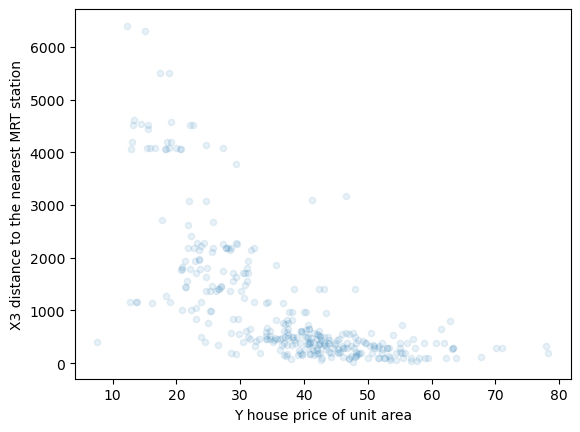

In [23]:
housing.plot(kind="scatter",y="X3 distance to the nearest MRT station",x="Y house price of unit area",alpha=0.1)

In [24]:
housing_labels=stra_train_set.drop("Y house price of unit area", axis=1)
housing_labels=stra_train_set["Y house price of unit area"].copy()

In [25]:
median=housing["X3 distance to the nearest MRT station"].median()

In [26]:
median

492.2313

In [27]:
#before we started imputer
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,209.368580,2013.142767,18.019033,1074.566055,4.102719,24.969250,121.533541,37.623565
std,120.383667,0.280728,11.497031,1248.351349,2.944182,0.012326,0.015267,12.960756
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.933630,121.475160,7.600000
25%,103.500000,2012.917000,9.100000,289.324800,1.000000,24.963050,121.529675,27.300000
50%,209.000000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538440,38.300000
75%,311.500000,2013.417000,29.600000,1442.932500,6.000000,24.978045,121.543395,46.150000
max,414.000000,2013.583000,43.800000,6396.283000,10.000000,25.014590,121.566270,78.300000


In [28]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([ 209.     , 2013.167  ,   16.1    ,  492.2313 ,    4.     ,
         24.9711 ,  121.53844,   38.3    ])

In [30]:
X = imputer.transform(housing)

In [31]:
housing_tr=pd.DataFrame(X,columns=housing.columns)


In [32]:
housing_tr.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,209.368580,2013.142767,18.019033,1074.566055,4.102719,24.969250,121.533541,37.623565
std,120.383667,0.280728,11.497031,1248.351349,2.944182,0.012326,0.015267,12.960756
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.933630,121.475160,7.600000
25%,103.500000,2012.917000,9.100000,289.324800,1.000000,24.963050,121.529675,27.300000
50%,209.000000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538440,38.300000
75%,311.500000,2013.417000,29.600000,1442.932500,6.000000,24.978045,121.543395,46.150000
max,414.000000,2013.583000,43.800000,6396.283000,10.000000,25.014590,121.566270,78.300000


## Sci-Kit Learn Design

Primarily three types of objects
1. Estimators- estimates some parameters based on a dataset. Eg:- imputer. It has a fit() method. fit() method fits the dataset and calculates  internal parameters.
2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms

3. Predictors - LinearRegression model is an example of predictor. fit(), predict() are two common functions. It also gives some score function which will evaluate the predictions.



#  Feature Scaling

two types of feature scaling methods:
1. Min-Max scaling(Normalization)
 (value-min)/(max-min)
 Sklearn provides class called Min-Max scaler
2. Standardization
(value-mean)/std
result ka variance 1 ho jata h
for this sklearn provides a class standard scalar for this


 

## Creating a Pipeline


In [33]:
from sklearn.pipeline import Pipeline
#kuch functions tab better kaam karte h jab saare attributes same scale ke ho

In [34]:
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),
                     ('std scaler',StandardScaler()),
                     ]) #add as many as you want in pipeline

In [35]:
housing_num_tr=my_pipeline.fit_transform(housing)


In [36]:
housing_num_tr.shape  #this is a numpy array

(331, 8)

#  Selecting a desired model for Nova Real Estates

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [38]:
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()  # best model

model.fit(housing_num_tr,housing_labels)


RandomForestRegressor()

In [39]:
some_data=housing.iloc[:4]
some_labels=housing_labels.iloc[:4]

In [40]:
prepared_data=my_pipeline.transform(some_data)

In [41]:
model.predict(prepared_data)

array([22.84 , 47.06 , 15.538, 44.295])

In [42]:
some_labels

369    22.8
360    47.1
180    15.5
188    44.3
Name: Y house price of unit area, dtype: float64

#  Evaluating the model

In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [44]:
lin_mse   #agar 0 aa jaye matlab overfitting h


0.07753415407854815

# Using better evaluation technique- Cross validation


In [45]:
#1 2 3 4 5 6 7 8 9 10
# 2 se 10 pe training karoge aur 1 pe testing karoge
#saare errors nikalo aur mean nikalo aur standard deviation nikalo


In [46]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10) #neg mean square error increases
#utility
rmse_scores=np.sqrt(-scores)

In [47]:
rmse_scores

array([0.34722975, 0.96311548, 0.18203796, 0.17153646, 1.39617157,
       0.14972966, 0.15621683, 0.32527708, 0.39868933, 0.69937353])

In [48]:
# write a function 

In [49]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
    
    

In [50]:
print_scores(rmse_scores)

Scores: [0.34722975 0.96311548 0.18203796 0.17153646 1.39617157 0.14972966
 0.15621683 0.32527708 0.39868933 0.69937353]
Mean: 0.4789377647356957
Standard deviation: 0.3958419001750764


Quiz: Convert this notebook into a python file and run the pipeline using VS


Quiz2: modify program to automate the presentation of outputs from all three models

# saving the model

In [51]:
from joblib import dump,load
dump(model,"Nova.joblib")

['Nova.joblib']

# Testing the model on test data


In [52]:
X_test=stra_test_set.drop("Y house price of unit area",axis=1)
Y_test=stra_test_set["Y house price of unit area"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Y house price of unit area


In [53]:
prepared_data


array([[ 1.33634919, -1.69732575,  0.18998546,  0.89096979, -0.37510886,
        -0.48993566, -1.38876478, -1.14545847],
       [ 1.26147503, -1.69732575,  1.29629087, -0.7920515 ,  2.00606161,
         1.11723968,  0.43815207,  0.73227073],
       [-0.23600818, -1.69732575,  0.7736269 ,  2.70742149, -1.39561049,
        -1.64697191, -2.44883575, -1.70954996],
       [-0.16945337, -0.80543727,  1.46180113, -0.70962877,  1.32572719,
         0.63541209,  0.62838758,  0.51590687]])

In [54]:
prepared_data[0]

array([ 1.33634919, -1.69732575,  0.18998546,  0.89096979, -0.37510886,
       -0.48993566, -1.38876478, -1.14545847])